In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('df.csv')

In [3]:
df.columns

Index(['Length', 'DictOGlyc-MaxScore', 'DictOGlyc-AvgScore',
       'DictOGlyc-No_Sites_Score', 'DictOGlyc-No_Sites', 'DictOGlyc-AvgDiff',
       'DictOGlycMaxPosDiff', 'DictOGlyc_Largest_Diff',
       'DictOGlyc-No_Score_Sites_Length', 'DictOGlyc-No_Sites_length',
       ...
       'NetMhcPan-B-AvgRank', 'NetMhcPan-B-Count_Score',
       'NetMhcPan-B-Average_MHC_Length', 'NetMhcPan-B_Count_Score_Length',
       'NetMhcPan-B_Average_Comb_Length', 'NetMhcPan-B_WeakBinders',
       'NetMhcPan-B_StrongBinders', 'NetMhcPan-B_WeakBinders_Length',
       'NetMhcPan-B_StrongBinders_Length', 'Label'],
      dtype='object', length=526)

In [34]:
predictors = df.drop('Label', axis=1)
outcome = df['Label']

In [35]:
outcome.value_counts()

 1    200
-1    200
Name: Label, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.3, random_state=42)

In [37]:
clf = RandomForestClassifier()

In [38]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
gini = pd.DataFrame({'attr': x_test.columns, 'importance': clf.feature_importances_})

In [40]:
gini.sort_values(by='importance', ascending=False, inplace=True)

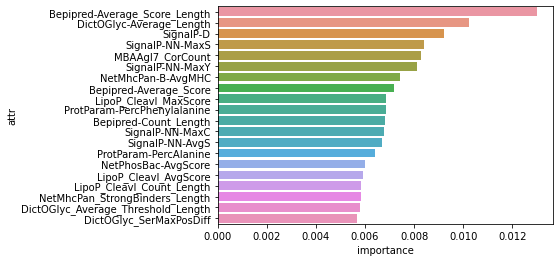

In [53]:
sns.barplot(x='importance', y='attr', data=gini[:20])
plt.show()

In [23]:
selector = RFECV(clf, step=1, cv=5, verbose=2)

In [24]:
selector = selector.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


Fitting estimator with 525 features.
Fitting estimator with 524 features.
Fitting estimator with 523 features.
Fitting estimator with 522 features.
Fitting estimator with 521 features.
Fitting estimator with 520 features.
Fitting estimator with 519 features.
Fitting estimator with 518 features.
Fitting estimator with 517 features.
Fitting estimator with 516 features.
Fitting estimator with 515 features.
Fitting estimator with 514 features.
Fitting estimator with 513 features.
Fitting estimator with 512 features.
Fitting estimator with 511 features.
Fitting estimator with 510 features.
Fitting estimator with 509 features.
Fitting estimator with 508 features.
Fitting estimator with 507 features.
Fitting estimator with 506 features.
Fitting estimator with 505 features.
Fitting estimator with 504 features.
Fitting estimator with 503 features.
Fitting estimator with 502 features.
Fitting estimator with 501 features.
Fitting estimator with 500 features.
Fitting estimator with 499 features.
F

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


In [28]:
f = selector.get_support(1)

In [30]:
x = df[df.columnbs[f]] # final features`

In [33]:
len(x.columns)

263